<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.161391,20.107838,53.465515,0.027533,144.762277,145.566703,-0.804425
1,0.0,1.0,50.577977,70.357052,78.547844,-1.200120,208.282753,210.673587,-2.390834
2,0.0,2.0,85.677446,89.104845,34.957909,-9.944952,209.795249,218.067515,-8.272266
3,0.0,3.0,47.557066,80.660508,86.242170,5.468396,229.928140,225.881144,4.046996
4,0.0,4.0,44.732970,83.639019,77.615088,-1.691308,214.295769,216.738216,-2.442447
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,51.606352,91.424471,43.005834,-2.594797,193.441860,198.901712,-5.459853
19996,999.0,16.0,79.469739,53.641282,31.802815,-4.707912,170.205924,174.929511,-4.723586
19997,999.0,17.0,70.768106,45.646102,39.905873,9.270357,175.590438,165.724586,9.865852
19998,999.0,18.0,85.841967,79.059314,73.519002,4.959037,253.379319,249.236765,4.142554


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    61.161391  20.107838  53.465515  0.027533  144.762277   
      1.0    50.577977  70.357052  78.547844 -1.200120  208.282753   
      2.0    85.677446  89.104845  34.957909 -9.944952  209.795249   
      3.0    47.557066  80.660508  86.242170  5.468396  229.928140   
      4.0    44.732970  83.639019  77.615088 -1.691308  214.295769   
...                ...        ...        ...       ...         ...   
999.0 15.0   51.606352  91.424471  43.005834 -2.594797  193.441860   
      16.0   79.469739  53.641282  31.802815 -4.707912  170.205924   
      17.0   70.768106  45.646102  39.905873  9.270357  175.590438   
      18.0   85.841967  79.059314  73.519002  4.959037  253.379319   
      19.0   73.394114  99.572871  83.405053  6.360232  272.732270   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    145.566703 -0.804425  
      1.0    210.673587 -2.390834  
      2.0    218.067515 -8.272266  
      3.0    225.881144  4.046996  
      4.0    216.738216 -2.442447  
...                 ...       ...  
999.0 15.0   198.901712 -5.459853  
      16.0   174.929511 -4.723586  
      17.0   165.724586  9.865852  
      18.0   249.236765  4.142554  
      19.0   268.613054  4.119216  

[20000 rows x 7 columns]

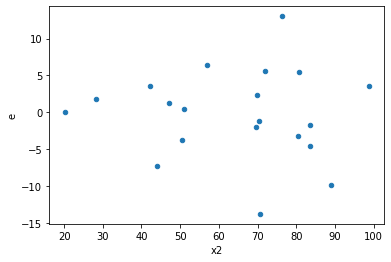

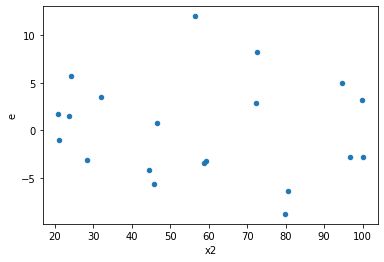

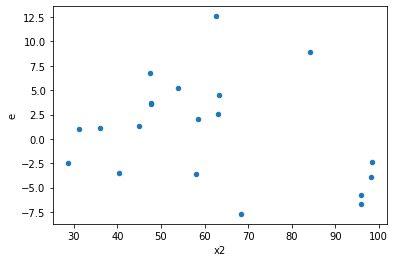

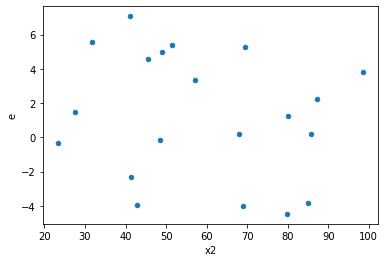

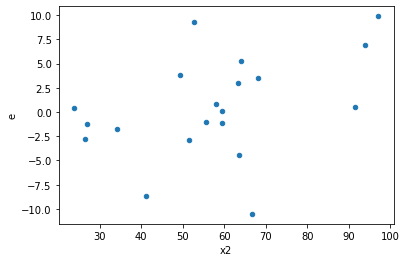

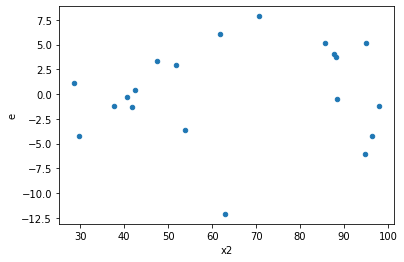

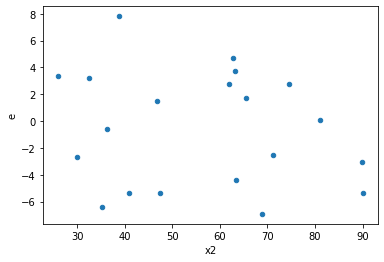

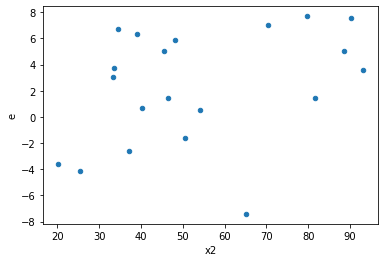

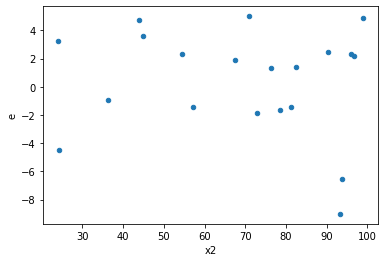

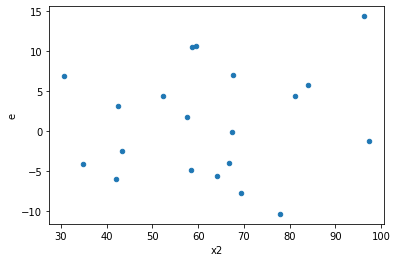

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,3.0,11.0,78.0228095239276,422.79662868182885,26.007603174642536,38.43605715289353,1.4778777150202278,0.5486126620708884,0.7256936689645558,0.2743063310354442,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,151.27800334600494,258.4436684417142,30.255600669200987,28.715963160190466,0.9491123139201856,0.9897803500217623,0.5051098249891188,0.4948901750108812,Reject001=1 : Homoscedasticity
2.0,8.0,6.0,82.96321211271695,306.39840211045953,10.370401514089618,51.066400351743255,4.924245245698782,0.06769581533756375,0.9661520923312181,0.033847907668781874,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,44.16541693852638,130.86453144405357,6.30934527693234,18.694933063436224,2.963054365052259,0.17513239165216055,0.9124338041739197,0.08756619582608027,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,151.77706747394492,204.19243764797116,21.68243821056356,29.170348235424452,1.3453444650524968,0.7053983808487936,0.6473008095756032,0.3526991904243968,Reject001=1 : Homoscedasticity
8.0,2.0,12.0,12.510703541078966,168.75643023278226,6.255351770539483,14.063035852731856,2.248160674026972,0.2963431026389787,0.8518284486805107,0.14817155131948934,Reject001=1 : Homoscedasticity
9.0,10.0,4.0,390.3499760615109,209.23126884619984,39.034997606151094,52.30781721154996,1.340023579335569,0.8355100716779886,0.5822449641610057,0.4177550358389943,Reject001=1 : Homoscedasticity
12.0,9.0,5.0,139.94587463204326,107.39324845699424,15.549541625782584,21.47864969139885,1.3813043630678639,0.755296685357727,0.6223516573211365,0.3776483426788635,Reject001=1 : Homoscedasticity
13.0,5.0,9.0,2.0985064318494797,62.16529272064483,0.41970128636989595,6.907254746738314,16.45754962173438,0.0005412011611551915,0.9997293994194224,0.00027060058057759573,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,3.0,11.0,78.0228095239276,422.79662868182885,26.007603174642536,38.43605715289353,1.4778777150202278,0.5486126620708884,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,151.27800334600494,258.4436684417142,30.255600669200987,28.715963160190466,0.9491123139201856,0.9897803500217623,Reject001=1 : Homoscedasticity
2.0,8.0,6.0,82.96321211271695,306.39840211045953,10.370401514089618,51.066400351743255,4.924245245698782,0.06769581533756375,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,44.16541693852638,130.86453144405357,6.30934527693234,18.694933063436224,2.963054365052259,0.17513239165216055,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,151.77706747394492,204.19243764797116,21.68243821056356,29.170348235424452,1.3453444650524968,0.7053983808487936,Reject001=1 : Homoscedasticity
5.0,5.0,9.0,112.9761011116472,163.23624347710816,22.595220222329438,18.13736038634535,0.802707838555224,0.850011090085051,Reject001=1 : Homoscedasticity
6.0,4.0,10.0,95.51997797899774,99.12741595355767,23.879994494749436,9.912741595355767,0.41510652766420486,0.4116009087797929,Reject001=1 : Homoscedasticity
7.0,4.0,10.0,88.87728793226009,92.7374811631339,22.219321983065022,9.27374811631339,0.4173731369202712,0.4146827372742958,Reject001=1 : Homoscedasticity
8.0,2.0,12.0,12.510703541078966,168.75643023278226,6.255351770539483,14.063035852731856,2.248160674026972,0.2963431026389787,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      921
Reject001=0 : Heteroscedasticity     79
Name: Result_test, dtype: int64